In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [4]:
df = pd.read_csv('../cleaned_data.csv', index_col=0)

In [5]:
df.head()

,target,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,e,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,e,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,e,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
X = df.drop('target', axis=1)

In [7]:
y = df['target']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')

In [17]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
y_pred = knn_model.predict(X_test)

In [19]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[1261    0]
 [   0 1177]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1261
           p       1.00      1.00      1.00      1177

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [70]:
cv_scores = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

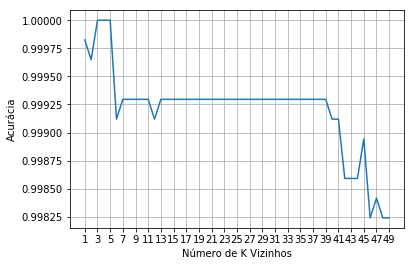

In [82]:
plt.plot(range(1,50), cv_scores)
plt.xlabel('Número de K Vizinhos')
plt.ylabel('Acurácia')
plt.xticks(np.arange(1,50,2))
plt.grid()
plt.show()